In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

# Map target labels to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# select disctinct species from tablo_ismi
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
df['species'].value_counts()
# select count(species), species from tablo_ismi group by species

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [19]:
# Features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 22                4.6               3.6                1.0               0.2
 15                5.7               4.4                1.5               0.4
 65                6.7               3.1                4.4               1.4
 11                4.8               3.4                1.6               0.2
 42                4.4               3.2                1.3               0.2,
 22        setosa
 15        setosa
 65    versicolor
 11        setosa
 42        setosa
 Name: species, dtype: object)

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

X_train[:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [21]:
# Fit and transform the training data
X_tum = scaler.fit_transform(X)


# Initialize the SVM model
svm_model2 = SVC(kernel='linear', random_state=42)

# Train the model
svm_model2.fit(X_tum, y)

# Make predictions
y_pred = svm_model2.predict(X_tum)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y, y_pred))

Accuracy: 96.67%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [22]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [23]:
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 96.67%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



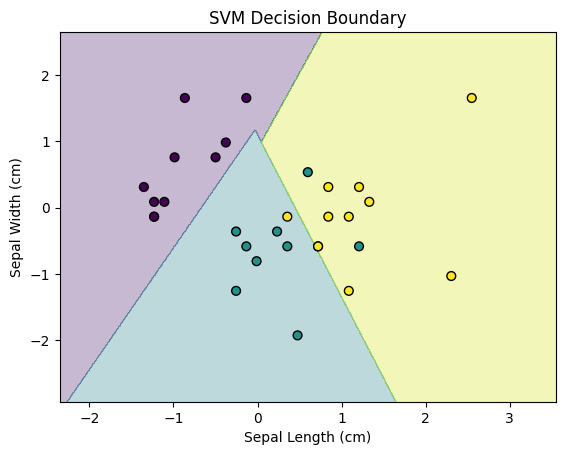

In [24]:
# Use only the first two features for visualization
X_vis = df.iloc[:, [0, 1]].values
y_vis = df['species'].values

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

# Split the data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Standardize the features
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

# Train the SVM model
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary')
    plt.show()

# Visualize
plot_decision_boundaries(X_test_vis, y_test_vis, svm_model_vis)

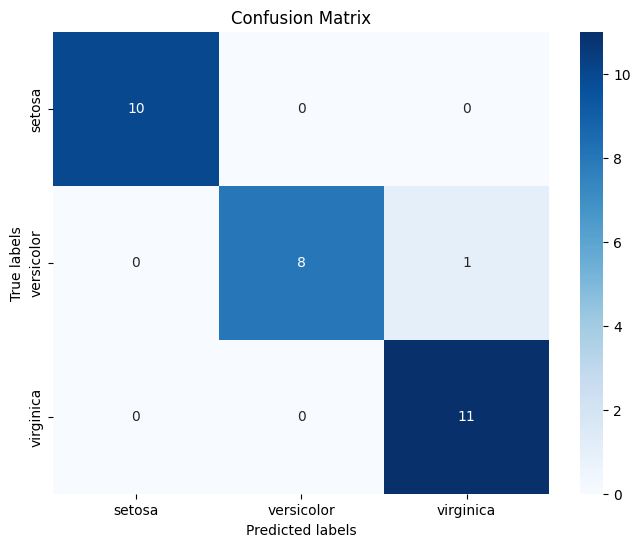

In [25]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()